# Nonlinear Optimal Control

This notebook contains code for reading in TOMLAB optimized control data along with cost-minimized data obtained from the model simulations (run on Harvad Odyssey2 cluster; please refer to Miscellaneous code files for more information on how to run the simulations on a SLURM-type cluster) and making the Figure 2E plot in the main text.

In [1]:
from model import *

## Figure 3: Optimal repair protocol for an interdependent network

C:\Users\edsun\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<Figure size 432x288 with 0 Axes>

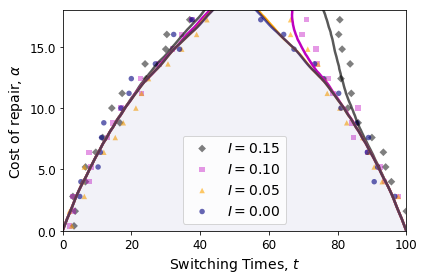

In [26]:
from scipy.signal import savgol_filter

colors = ['#000080', '#FFA500', 'm', 'k', '#FFC0CB']
markers = ['o', '^', 's', 'D', '*']
transparencies = [0.6, 0.6, 0.4, 0.5, 1.0]

filelist2=['Gilbert/0.1/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist3=['Gilbert/0.15/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist1=['Gilbert/0.0/ParamCurvesData/varya_f0.025_r0.01_a0.196_T100_step1_d0_depoff_N1000']
filelist=['Gilbert/0.2/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist4=['Gilbert/0.25/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelist5=['Gilbert/0.05/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']

# new files
filelista=['Gilbert/0.025/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelistb=['Gilbert/0.075/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelistc=['Gilbert/0.125/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelistd=['Gilbert/0.175/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
fileliste=['Gilbert/0.225/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']
filelistf=['Gilbert/0.275/ParamCurvesData/varya_f0.025_r0.01_a19.6_T100_step1_d0_depoff_N1000']

f = 0.025
alpha=10
T = 100
parameter_list = np.arange(0,20,0.4)


def bin_data (x, y, n):
    '''
    x = array of x-value lists
    y = array of y-value lists
    n = number of points that each binned average will contain
    '''
    k = 0
    new_x = []
    new_y = []
    
    running_avg_x = 0
    running_avg_y = 0
    
    while k < len(x):
        if k%n == 0 and k>0:
            new_x.append(running_avg_x)
            new_y.append(running_avg_y)
            running_avg_x = 0
            running_avg_y = 0
        running_avg_x += x[k]/n
        running_avg_y += y[k]/n
        k+= 1
        
    return (new_x, new_y)


#plt.figure(figsize=(6,3))
plt.figure()
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


        
for n, filename in enumerate(filelist3):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_f = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none', label='$I=0.15$') # 0.15
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[3], marker=markers[3], alpha=transparencies[3], s=30, edgecolors='none')#, label='$I=0.15$') # 0.15


for n, filename in enumerate(filelist2):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_e = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none', label='$I=0.10$') # 0.1
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[2], marker=markers[2], alpha=transparencies[2], s=30, edgecolors='none')#, label='$I=0.10$') # 0.1


for n, filename in enumerate(filelist5):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_h = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none', label='$I=0.05$') # 0.05
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[1], marker=markers[1], alpha=transparencies[1], s=30, edgecolors='none')#, label='$I=0.05$') # 0.05



for n, filename in enumerate(filelist1):
    # open and read file data        
    input_file_path = './Nonlinear/' + filename + '.csv'
    with open(input_file_path, 'rt') as tsvin:
        tsvin = csv.reader(tsvin, delimiter=',')
        row_list = list(tsvin)
        T1_list = [float(i) for i in row_list[1]]
        T2_list = [float(i) for i in row_list[2]]
        # Select the T curve to fit over
        #T_list_d = T2_list
T1_list, new_prm_list = bin_data(T1_list, parameter_list, 3)
plt.scatter(T1_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none', label='$I=0.00$') # 0
T2_list, new_prm_list = bin_data(T2_list, parameter_list, 3)
plt.scatter(T2_list, new_prm_list, color=colors[0], marker=markers[0], alpha=transparencies[0], s=30, edgecolors='none')#, label='$I=0.00$') # 0


# Read in numerical results and plot
I_thresh = 0.2

def extract(raw_string, start_marker, end_marker):
    start = raw_string.index(start_marker) + len(start_marker)
    end = raw_string.index(end_marker, start)
    return (raw_string[start:end])

alpha_list = []
T1_dict= {}
T2_dict = {}

dirs = [x[0] for x in os.walk('./TOMLAB_data/alpha/')]
dirs = dirs[1:]
for d_idx, d in enumerate(dirs):
    files = [f for f in os.listdir(d)]
    for f_idx, f in enumerate(files):
        if 'nonlin_alpha_' in f:
            # Extract alpha value
            alpha = float(extract(d+'/'+f,'alpha_','.csv'))
            alpha_list.append(alpha)
            # Read I, T1, T2
            results_mat = np.genfromtxt(d+'/'+f,delimiter=',')
            I_vals = results_mat[0,:]
            T1_list = results_mat[1,:]
            T2_list = results_mat[2,:]
        
            for i, I in enumerate(I_vals):
                if I < I_thresh:
                    if str(I) not in T1_dict:
                        T1_dict[str(I)] = []
                        T2_dict[str(I)] = []
                    if d_idx == 0:
                        T1_dict[str(I)].append(T1_list[i])
                        T2_dict[str(I)].append(T2_list[i])
                    else:
                        T1_dict[str(I)][f_idx] += T1_list[i]
                        T2_dict[str(I)][f_idx] += T2_list[i]

k = 0
for i, I in enumerate(I_vals[::-1]):
    norm = 1/len(dirs)
    if I in [0., 0.05, 0.1, 0.15, 0.2]:
        if I < I_thresh:
            sorted_T1_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T1_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_alpha_list = sorted_T1_lists[0]
            sorted_T1_list = sorted_T1_lists[1]
            sorted_T2_lists = [list(x) for x in zip(*sorted(zip(alpha_list, T2_dict[str(I)]), key=lambda pair: pair[0]))]
            sorted_T2_list = sorted_T2_lists[1]

            norm_T1 = norm*np.array(sorted_T1_list)
            norm_T2 = norm*np.array(sorted_T2_list)
            
            # Smoothen with SG filter
            norm_T1 = savgol_filter(norm_T1, 11, 2)
            norm_T2 = savgol_filter(norm_T2, 11, 2)
            
            # Prepend trivial case to extend analytic shading
            sorted_alpha_list = [0]+sorted_alpha_list
            norm_T2 = np.concatenate(([100],norm_T2))
            norm_T1 = np.concatenate(([0],norm_T1))
            
            if colors[::-1][k] == 'k':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)#, linestyle='--')
            elif colors[::-1][k] == '#000080':
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5)
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], alpha=0.65, linewidth=2.5) 
            else:
                plt.plot(norm_T2, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                plt.plot(norm_T1, sorted_alpha_list, color=colors[::-1][k], linewidth=2.5)#, linestyle='--')
                
            # shading
            if I == 0:
                plt.fill_betweenx(sorted_alpha_list, norm_T1, norm_T2, color='#000080', alpha=0.05)
        k+=1
        
plt.xlabel('Switching Times, $t$', fontsize=14)
plt.ylabel('Cost of repair, '+r'$\alpha$', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim(0,100)
plt.ylim(0,18)
plt.yticks([round(x,2) for x in np.arange(0,18,5.0)])
plt.legend(loc='lower center', borderaxespad=0.5, fontsize=14)
plt.tight_layout()
plt.savefig('Fig3.png', dpi=800)
plt.show()